<a href="https://colab.research.google.com/github/martinparlanti/Portfolios/blob/main/Monte_carlo_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns



Function to download historical data




In [6]:
def get_stock_data(ticker, start_date, end_date):
 data = pd.DataFrame()
 for ticker in stocks:
  stock_data = yf.download(ticker, start= start_date, end = end_date)['Close']
  data[ticker] = stock_data
 return data


Initial configuration

In [7]:
stocks = ['AAPL','MSFT','SPY','WM','JNJ','NVDA','TSLA','GLD','TLT','XLE','PG','BAC','JPM']
years = 6
end_date = dt.datetime.now()
start_date =end_date - dt.timedelta(days=356*years)


Obtaining data

In [8]:
stock_data = get_stock_data(stocks, start_date, end_date)
stock_data.head()

/tmp/ipython-input-1132997411.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start= start_date, end = end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1132997411.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start= start_date, end = end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1132997411.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start= start_date, end = end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1132997411.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start= start_date, end = end_date)['Close']
[********************

,AAPL,MSFT,SPY,WM,JNJ,NVDA,TSLA,GLD,TLT,XLE,PG,BAC,JPM
Date,,,,,,,,,,,,,
2020-04-15,68.725655,163.642639,256.025879,88.039284,125.512886,6.993958,48.655334,161.850006,141.815353,12.719608,104.267242,19.274137,77.891571
2020-04-16,69.271721,168.555283,257.260925,88.877518,127.221436,7.339123,49.680668,161.710007,143.425873,12.176065,104.508080,18.605320,74.923149
2020-04-17,68.331810,170.040543,264.210968,91.355698,129.218948,7.279853,50.259335,158.570007,141.503311,13.469452,107.251953,20.220907,81.657890
2020-04-20,66.913445,166.670166,259.556091,89.469711,128.921387,7.148610,49.757332,159.699997,142.641785,13.048903,103.733925,19.543398,78.680862
2020-04-21,64.845131,159.777206,251.675110,88.130402,127.229897,6.711800,45.781334,158.610001,144.437775,12.818792,102.942619,18.796413,76.398773


Daily returns

In [15]:
returns = stock_data.pct_change()
returns.tail()

,AAPL,MSFT,SPY,WM,JNJ,NVDA,TSLA,GLD,TLT,XLE,PG,BAC,JPM
Date,,,,,,,,,,,,,
2026-02-11,0.006650,-0.021536,-0.000231,0.012688,0.010531,0.008009,0.007196,0.011311,-0.005309,0.026129,0.005783,-0.027803,-0.023438
2026-02-12,-0.049982,-0.006257,-0.015449,-0.015554,0.015320,-0.016364,-0.026152,-0.034728,0.013286,-0.018188,0.007563,-0.024698,-0.026317
2026-02-13,-0.022733,-0.001294,0.000705,0.015194,-0.004498,-0.022093,0.000887,0.024879,0.005491,0.006854,-0.007072,0.000571,-0.000297
2026-02-17,0.031668,-0.011113,0.001613,0.002985,-0.000493,0.011816,-0.016314,-0.031170,0.001672,-0.011040,-0.003249,0.003616,0.015138
2026-02-18,0.001781,0.006904,0.005038,-0.004932,0.006822,0.016273,0.001680,0.022490,-0.003783,0.019163,-0.016860,0.011756,0.005372


Parameters for Monte Carlo simulation

In [10]:
num_portfolios = 1000
rf_rate = 0.04

Arrays to save the results

In [11]:
all_weights = np.zeros((num_portfolios,len(stocks)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)


In [12]:
for port in range(num_portfolios):
  weights = np.random.random(len(stocks))
  weights = weights/np.sum(weights)  #Normalizacion de pesos
  all_weights[port,:] = weights

  port_ret = np.sum(returns.mean()*weights)*252
  ret_arr[port] = port_ret

  port_vol = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
  vol_arr[port] = port_vol

  sharpe_port = (port_ret-rf_rate)/port_vol
  sharpe_arr[port] = sharpe_port


In [13]:
optimal_idx = sharpe_arr.argmax()
optimal_weights = all_weights[optimal_idx,:]
optimal_ret = ret_arr[optimal_idx]
optimal_vol = vol_arr[optimal_idx]
optimal_sharpe = sharpe_arr[optimal_idx]

results = pd.DataFrame({'Return':ret_arr,'Volatility':vol_arr,'Sharpe Ratio':sharpe_arr})

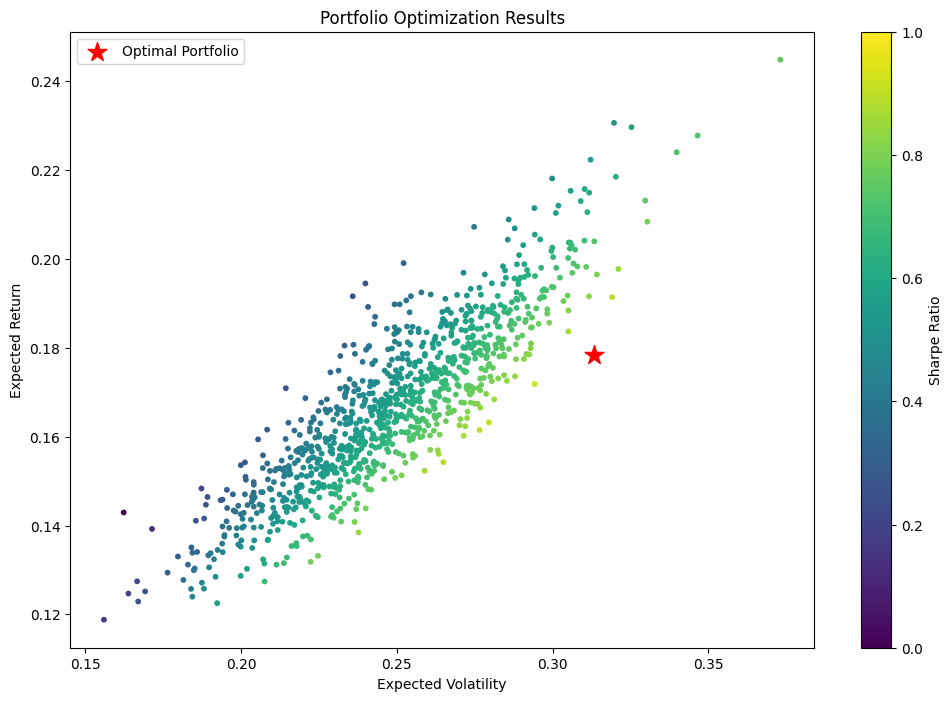

The optimal portfolio:
Return: 31.32%
Volatility: 17.84%
Sharpe Ratio: 153.19%
AAPL: 2.92%
MSFT: 7.15%
SPY: 5.50%
WM: 13.00%
JNJ: 12.48%
NVDA: 20.89%
TSLA: 2.94%
GLD: 13.72%
TLT: 0.90%
XLE: 14.99%
PG: 2.17%
BAC: 2.41%
JPM: 0.91%


In [14]:
plt.figure(figsize=(12,8))
plt.scatter(ret_arr,vol_arr,c=sharpe_arr,cmap='viridis', marker='o',s=10)
plt.scatter(optimal_ret, optimal_vol,c='red',marker='*',s=200, label="Optimal Portfolio")
plt.ylabel('Expected Return')
plt.xlabel('Expected Volatility')
plt.colorbar(label='Sharpe Ratio')
plt.title("Portfolio Optimization Results")
plt.legend()
plt.show()

print("The optimal portfolio:")
print(f"Return: {optimal_ret*100:.2f}%")
print(f"Volatility: {optimal_vol*100:.2f}%")
print(f"Sharpe Ratio: {optimal_sharpe*100:.2f}%")
for stock,weight in zip(stocks,optimal_weights):
  print(f"{stock}: {weight*100:.2f}%")